### CS 457 - Homework Assignment 5: SQL
### Shahzaib Amir
### Email Address: sa05578@st.habib.edu.pk

### PART 2

In [1]:
import psycopg2
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas.io.sql as psql

In [2]:
conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="123")

Reading Data

In [3]:
df1 = psql.read_sql('SELECT * FROM EmployeeAttrition1', conn)
df2 = psql.read_sql('SELECT * FROM EmployeeAttrition2', conn)

In [4]:
df1.head()

,employeenumber,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,2,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,4,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,5,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,7,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df2.head()

,employeenumber,over18,overtime,attrition
0,1,Y,Yes,Yes
1,2,Y,No,No
2,4,Y,Yes,Yes
3,5,Y,Yes,No
4,7,Y,No,No


### Univariate Analysis

In [6]:
df1.isnull().any()

employeenumber              False
age                         False
businesstravel              False
dailyrate                   False
department                  False
distancefromhome            False
education                   False
educationfield              False
environmentsatisfaction     False
gender                      False
hourlyrate                  False
jobinvolvement              False
joblevel                    False
jobrole                     False
jobsatisfaction             False
maritalstatus               False
monthlyincome               False
monthlyrate                 False
numcompaniesworked          False
percentsalaryhike           False
performancerating           False
relationshipsatisfaction    False
standardhours               False
stockoptionlevel            False
totalworkingyears           False
trainingtimeslastyear       False
worklifebalance             False
yearsatcompany              False
yearsincurrentrole          False
yearssincelast

Gender

In [7]:
count_male = df1['gender'].value_counts().Male
count_female = df1['gender'].value_counts().Female

count_educationfield = df1['educationfield'].value_counts()

count_HR = count_educationfield['Human Resources']
count_LS = count_educationfield['Life Sciences']
count_MAR = count_educationfield['Marketing']
count_MED = count_educationfield['Medical']
count_OTHER = count_educationfield['Other']
count_TD = count_educationfield['Technical Degree']

count_OT = df2['overtime'].value_counts()

count_Yes = count_OT['Yes']
count_No = count_OT['No']

count_JR = df1['jobrole'].value_counts()

count_MD = count_JR['Manufacturing Director']
count_RS = count_JR['Research Scientist']
count_RD = count_JR['Research Director']
count_LT = count_JR['Laboratory Technician']
count_SR = count_JR['Sales Representative']
count_HEALTHR = count_JR['Healthcare Representative']
count_SE = count_JR['Sales Executive']
count_HUMANR = count_JR['Human Resources']
count_MANAGER = count_JR['Manager']

# print(set(df1['educationfield']))
# print(set(df2['overtime']))
# print(set(df1['jobrole']))


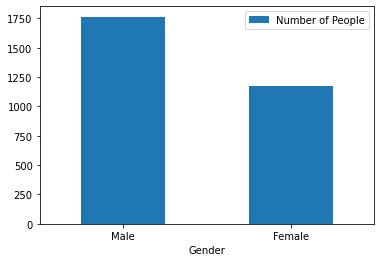

In [8]:
df_1 = pd.DataFrame({'Gender':['Male', 'Female'], 'Number of People':[count_male, count_female]})
ax1 = df_1.plot.bar(x='Gender', y='Number of People', rot=0)

The above Gender Bar-chart shows that there are more Male employees than Female employees.

EducationField

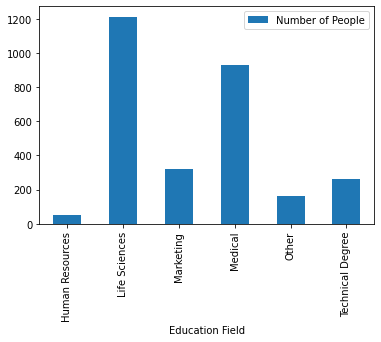

In [9]:
df_2 = pd.DataFrame({'Education Field':['Human Resources','Life Sciences', 'Marketing','Medical','Other', 'Technical Degree'],
 'Number of People':[count_HR, count_LS, count_MAR, count_MED, count_OTHER, count_TD ]})
ax2 = df_2.plot.bar(x='Education Field', y='Number of People', rot=90)

The above Education Field Bar-chart shows that applicants with a Life Sciences degree are the most likely to be hired, while those with a Human Resources degree are the least likely to be hired.

OverTime

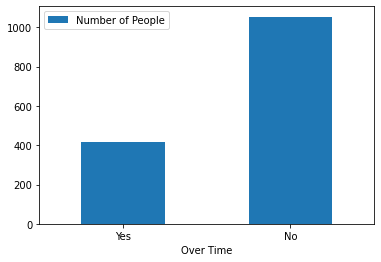

In [10]:
df_3 = pd.DataFrame({'Over Time':['Yes', 'No'], 'Number of People':[count_Yes, count_No]})
ax3 = df_3.plot.bar(x='Over Time', y='Number of People', rot=0)

The above OverTime Bar-chart shows that very few number of employees work overtime. 

Pie-Chart

Distribution of Job Roles

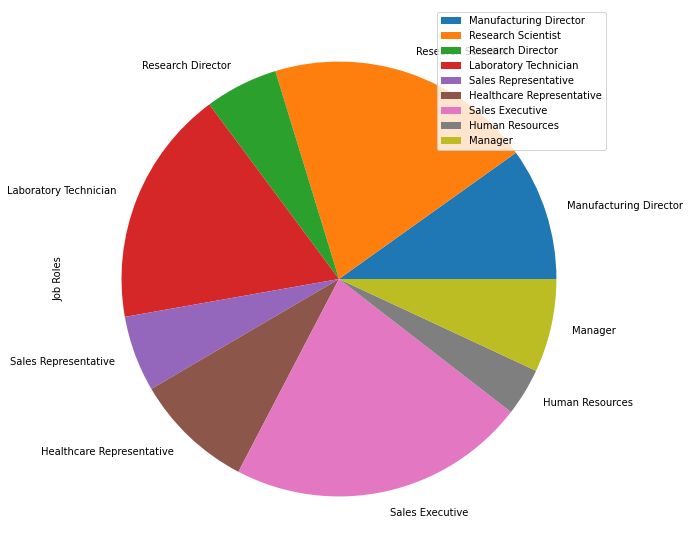

In [11]:

df = pd.DataFrame({'Job Roles': [count_MD, count_RS, count_RD, count_LT, count_SR, count_HEALTHR, count_SE, count_HUMANR, count_MANAGER]},
                  index=['Manufacturing Director', 'Research Scientist', 'Research Director', 'Laboratory Technician', 'Sales Representative', 'Healthcare Representative',
                   'Sales Executive', 'Human Resources', 'Manager'])
plot = df.plot.pie(y='Job Roles', figsize=(10, 10))
##Reference https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html

The given dataset has majority of employees working as Sales Excutive while the number of Research Scientist and Laboratory Technicican are almost the same. Moreover, it also showd the diversity of the works done by the employees at a firm. 

### Bivariate Analysis

<AxesSubplot:xlabel='totalworkingyears', ylabel='monthlyincome'>

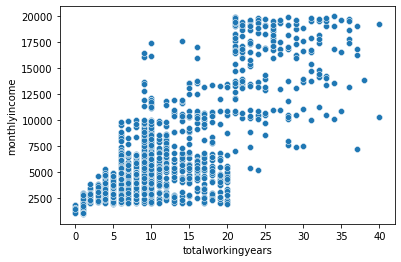

In [12]:
sns.scatterplot(data = df1, x="totalworkingyears", y="monthlyincome")

The analysis of the above data is as below:

There are a lot of newer employees on the job.

Employees with fewer years on the job received a lower salary than those with more.

There are very few people in the senior category (worked for more than 25 years) who have a higher income.

Correlation Plot

<AxesSubplot:>

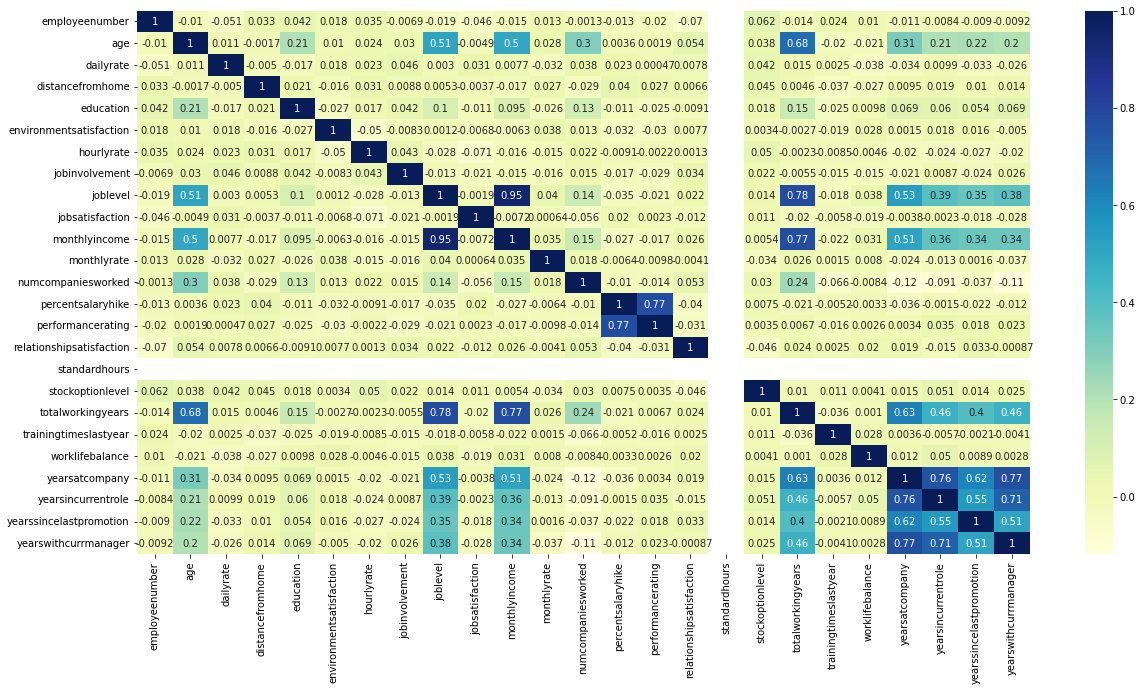

In [13]:
plt.figure(figsize = (20,10))
sns.heatmap(df1.corr(), cmap='YlGnBu', annot=True)

The analysis of the correlation plot is as follows:

We can see that job level and monthly income have a positive correlation infact very close to 1, implying that the higher the job level, the higher the income.

There is a positive correlation between Monthly Income and Total Working Years, indicating that employees with more work experience in the company earn more money.

Moreover, job level also has a positive correlation with working years as an employee's working years increase, he or she is promoted based on seniority.

